# Part two - Customer Support (Chatbot)

PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:
1. Start chat session with greetings and ask what the user is looking for.
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

## Importing the Data

In [2]:
with open('GL Bot.json') as content:
    data1 = json.load(content)

In [3]:
data1

{'intents': [{'tag': 'Intro',
   'patterns': ['hi',
    'how are you',
    'is anyone there',
    'hello',
    'whats up',
    'hey',
    'yo',
    'listen',
    'please help me',
    'i am learner from',
    'i belong to',
    'aiml batch',
    'aifl batch',
    'i am from',
    'my pm is',
    'blended',
    'online',
    'i am from',
    'hey ya',
    'talking to you for first time'],
   'responses': ['Hello! how can i help you ?'],
   'context_set': ''},
  {'tag': 'Exit',
   'patterns': ['thank you',
    'thanks',
    'cya',
    'see you',
    'later',
    'see you later',
    'goodbye',
    'i am leaving',
    'have a Good day',
    'you helped me',
    'thanks a lot',
    'thanks a ton',
    'you are the best',
    'great help',
    'too good',
    'you are a good learning buddy'],
   'responses': ['I hope I was able to assist you, Good Bye'],
   'context_set': ''},
  {'tag': 'Olympus',
   'patterns': ['olympus',
    'explain me how olympus works',
    'I am not able to understan

In [4]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [5]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [6]:
data.head()

,inputs,tags
0,hi,Intro
1,how are you,Intro
2,is anyone there,Intro
3,hello,Intro
4,whats up,Intro


In [7]:
data = data.sample(frac=1)

## Pre-processing

In [8]:
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
114,i hate you,Profane
85,ann,NN
113,screw you,Profane
70,nb,SL
86,artificial intelligence,NN
...,...,...
69,naive bayes,SL
21,thanks,Exit
58,i am not able to understand random forest,SL
79,unable to understand deep learning,NN


In [9]:
#tokenize the data

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#apply padding

X_train = pad_sequences(train)

#encoding the outputs

le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [10]:
input_shape = X_train.shape[1]
print(input_shape)

8


In [11]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  160
output length:  8


## Building the Neural Network

In [12]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary + 1,10)(i)
x = LSTM(20,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [13]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [14]:
#training the model
train = model.fit(X_train,y_train,epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 6ms/step - loss: 2.0793 - accuracy: 0.1323
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 2.0733 - accuracy: 0.2552
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 2.0651 - accuracy: 0.3552
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 2.0593 - accuracy: 0.2604
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 2.0539 - accuracy: 0.2240
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 2.0396 - accuracy: 0.2344
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 2.0271 - accuracy: 0.2323
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 2.0080 - accuracy: 0.2562
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 2.0043 - accuracy: 0.2313
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 1.9757 - accuracy: 0.2021
Epoch 11/150
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.7656
Epoch 85/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.8198
Epoch 86/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.8177
Epoch 87/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.8542
Epoch 88/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.8458
Epoch 89/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.8865
Epoch 90/150
4/4 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.8802
Epoch 91/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.8875
Epoch 92/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5372 - accuracy: 0.8865
Epoch 93/150
4/4 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.8844
Epoch 94/150
4/4 [===============

## Model Analyis

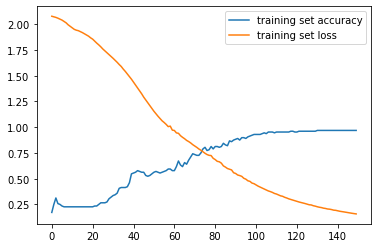

In [15]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

### Validation

In [17]:
#chatting
import random


while True:
    texts_p = []
    prediction_input = input('You : ')
    if prediction_input.lower() == "quit":
        break
  #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

  #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

  #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("My Bot : ",random.choice(responses[response_tag]))
    

You : Hello
My Bot :  Hello! how can i help you ?
You : I want info on Deep Learning
My Bot :  Link: Neural Nets wiki
You : Thanks
My Bot :  I hope I was able to assist you, Good Bye
You : quit
